# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [48]:
#loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
#loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

C:\Users\thdam\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Explore Data

In [6]:
loan_data_inputs_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,mths_since_last_delinq:Missing,mths_since_last_delinq:0-20,mths_since_last_delinq:20-30,mths_since_last_delinq:50-80,mths_since_last_delinq:>=81,mths_since_last_record:Missing,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
305053,46845677,14050.0,14050.0,14050.000000,36 months,15.61,491.26,D,D1,Graphic Artist / Prepress Operator,...,1,0,0,0,0,1,0,0,0,0
50247,65791753,20000.0,20000.0,20000.000000,36 months,12.05,664.77,C,C1,Custodian 2 supervisor,...,0,0,0,0,0,1,0,0,0,0
1630021,705535,20000.0,20000.0,19403.287009,36 months,10.00,645.35,B,B2,Aggregate Knowledge,...,1,0,0,0,0,1,0,0,0,0
927636,108579404,20000.0,20000.0,20000.000000,36 months,5.32,602.30,A,A1,Owner,...,1,0,0,0,0,1,0,0,0,0
758496,140791913,19200.0,19200.0,19200.000000,36 months,11.55,633.60,B,B4,Data Analyst,...,1,0,0,0,0,1,0,0,0,0


In [7]:
loan_data_targets_train.head()

,1
0,
NaN,good_bad
305053.0,0
50247.0,1
1630021.0,1
927636.0,1


In [8]:
loan_data_inputs_train.shape

(1808534, 273)

In [49]:
loan_data_targets_train.shape

(1808534, 1)

In [10]:
loan_data_inputs_test.shape

(452134, 377)

In [50]:
loan_data_targets_test.shape

(452134, 1)

### Selecting the Features

In [40]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A', 'grade:B', 'grade:C',
'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE', 
'home_ownership:OWN',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'addr_state:MO_NC_MD_IN_AK_NE_NJ', 
'addr_state:MI_PA_MN_TN_VA_HI',
'addr_state:OH_WI_AZ_MA_UT_DE',
'addr_state:GA_IL_WY_RI',
'addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME', 
'addr_state:FL',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ__ren_en__sm_b__mov',
'purpose:debt_consolidation',
'purpose:med__oth__house__wedd',
'purpose:major_purch__vacation__home_impr__car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<30',
'mths_since_issue_d:30-33',
'mths_since_issue_d:33-40',
'mths_since_issue_d:41-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<8.392',
'int_rate:8.392-11.987',
'int_rate:11.987-15.582',
'int_rate:15.582-19.177',
'int_rate:>19.177',
'mths_since_earliest_cr_line:<167',
'mths_since_earliest_cr_line:167-250',
'mths_since_earliest_cr_line:251-355',
'mths_since_earliest_cr_line:356-417',
'mths_since_earliest_cr_line:>417',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-20',
'mths_since_last_delinq:20-30',
'mths_since_last_delinq:50-80',
'mths_since_last_delinq:>=81',
'mths_since_last_record:Missing',
'mths_since_last_record:0-37',
'mths_since_last_record:37-60',
'mths_since_last_record:61-90',
'mths_since_last_record:>90'
]]

In [42]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'verification_status:Verified',
'purpose:educ__ren_en__sm_b__mov',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<30',
'int_rate:<8.392',
'mths_since_earliest_cr_line:<167',
'delinq_2yrs:0',
'inq_last_6mths:0',
'open_acc:0-3',
'pub_rec:0',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=10K',
'annual_inc:<20K',
'mths_since_last_delinq:Missing',
'mths_since_last_record:Missing'
]

In [43]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,...,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:0-20,mths_since_last_delinq:20-30,mths_since_last_delinq:50-80,mths_since_last_delinq:>=81,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
305053,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50247,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1630021,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
927636,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758496,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
reg = LogisticRegression()

In [46]:
pd.options.display.max_rows = None

In [51]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\thdam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([2.12466739])

In [53]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.67717535e+00,  1.20764719e+00,  9.05992991e-01,
         6.80889318e-01,  4.59436577e-01,  2.13331476e-01,
         2.46767127e-01,  1.13419196e-01,  8.52099092e-02,
         1.32418971e-01,  1.60949078e-01,  2.86674779e-01,
         4.07218150e-01,  5.39403869e-02,  6.38654983e-02,
         1.11619656e-01,  1.02279165e-01,  5.74282864e-02,
         2.32872617e-01,  1.34504583e-01,  2.15473609e-01,
         1.62637357e-01,  1.82326945e-01,  2.59637560e-02,
         1.73986564e-01,  1.38881604e-01,  1.55273988e-01,
         1.30314144e-01,  1.82086279e-01, -1.00787846e-01,
        -8.56474841e-01, -1.00547088e+00, -1.32815953e+00,
        -1.74331974e+00, -1.64732016e+00, -1.48346662e+00,
        -2.65294610e-01, -4.32307575e-01, -5.89457665e-01,
        -6.81005708e-01, -2.31492633e-02,  1.45460506e-02,
         4.03972193e-02,  1.20613513e-02, -2.25013536e-02,
        -6.37931584e-02, -1.62994999e-01, -3.21429542e-01,
        -6.58595684e-01, -1.25356429e-01, -2.50026112e-0

In [54]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [55]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,2.124667
1,grade:A,1.677175
2,grade:B,1.207647
3,grade:C,0.905993
4,grade:D,0.680889
5,grade:E,0.459437
6,grade:F,0.213331
7,home_ownership:MORTGAGE,0.246767
8,home_ownership:OWN,0.113419
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.085210


## Build a Logistic Regression Model with P-Values

In [57]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [58]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [59]:
reg = LogisticRegression_with_p_values()

In [60]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\thdam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.124667
1,grade:A,1.677175
2,grade:B,1.207647
3,grade:C,0.905993
4,grade:D,0.680889
5,grade:E,0.459437
6,grade:F,0.213331
7,home_ownership:MORTGAGE,0.246767
8,home_ownership:OWN,0.113419
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.085210


In [62]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [63]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [64]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [65]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.124667,NaN
1,grade:A,1.677175,0.000000e+00
2,grade:B,1.207647,0.000000e+00
3,grade:C,0.905993,0.000000e+00
4,grade:D,0.680889,2.437022e-240
5,grade:E,0.459437,1.184972e-114
6,grade:F,0.213331,1.004057e-21
7,home_ownership:MORTGAGE,0.246767,0.000000e+00
8,home_ownership:OWN,0.113419,3.666132e-46
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.085210,5.357958e-17


In [66]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A', 'grade:B', 'grade:C',
'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE', 
'home_ownership:OWN',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'addr_state:MO_NC_MD_IN_AK_NE_NJ', 
'addr_state:MI_PA_MN_TN_VA_HI',
'addr_state:OH_WI_AZ_MA_UT_DE',
'addr_state:GA_IL_WY_RI',
'addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME', 
'addr_state:FL',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ__ren_en__sm_b__mov',
'purpose:debt_consolidation',
'purpose:med__oth__house__wedd',
'purpose:major_purch__vacation__home_impr__car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<30',
'mths_since_issue_d:30-33',
'mths_since_issue_d:33-40',
'mths_since_issue_d:41-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<8.392',
'int_rate:8.392-11.987',
'int_rate:11.987-15.582',
'int_rate:15.582-19.177',
'int_rate:>19.177',
'mths_since_earliest_cr_line:<167',
'mths_since_earliest_cr_line:167-250',
'mths_since_earliest_cr_line:251-355',
'mths_since_earliest_cr_line:356-417',
'mths_since_earliest_cr_line:>417',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_record:Missing',
'mths_since_last_record:0-37',
'mths_since_last_record:37-60',
'mths_since_last_record:61-90',
'mths_since_last_record:>90'
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'verification_status:Verified',
'purpose:educ__ren_en__sm_b__mov',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<30',
'int_rate:<8.392',
'mths_since_earliest_cr_line:<167',
'delinq_2yrs:0',
'inq_last_6mths:0',
'open_acc:0-3',
'pub_rec:0',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=10K',
'annual_inc:<20K',
'mths_since_last_record:Missing'
]

In [67]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
305053,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50247,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1630021,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
927636,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
758496,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\thdam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
feature_name = inputs_train.columns.values

In [70]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.123457
1,grade:A,1.675925
2,grade:B,1.208961
3,grade:C,0.907496
4,grade:D,0.682518
5,grade:E,0.462513
6,grade:F,0.217647
7,home_ownership:MORTGAGE,0.246595
8,home_ownership:OWN,0.113124
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184


In [71]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.123457,NaN
1,grade:A,1.675925,0.000000e+00
2,grade:B,1.208961,0.000000e+00
3,grade:C,0.907496,0.000000e+00
4,grade:D,0.682518,1.414555e-241
5,grade:E,0.462513,3.310872e-116
6,grade:F,0.217647,1.495515e-22
7,home_ownership:MORTGAGE,0.246595,0.000000e+00
8,home_ownership:OWN,0.113124,6.020898e-46
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18


In [72]:
import pickle

In [73]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [74]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A', 'grade:B', 'grade:C',
'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE', 
'home_ownership:OWN',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'addr_state:MO_NC_MD_IN_AK_NE_NJ', 
'addr_state:MI_PA_MN_TN_VA_HI',
'addr_state:OH_WI_AZ_MA_UT_DE',
'addr_state:GA_IL_WY_RI',
'addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME', 
'addr_state:FL',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ__ren_en__sm_b__mov',
'purpose:debt_consolidation',
'purpose:med__oth__house__wedd',
'purpose:major_purch__vacation__home_impr__car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<30',
'mths_since_issue_d:30-33',
'mths_since_issue_d:33-40',
'mths_since_issue_d:41-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<8.392',
'int_rate:8.392-11.987',
'int_rate:11.987-15.582',
'int_rate:15.582-19.177',
'int_rate:>19.177',
'mths_since_earliest_cr_line:<167',
'mths_since_earliest_cr_line:167-250',
'mths_since_earliest_cr_line:251-355',
'mths_since_earliest_cr_line:356-417',
'mths_since_earliest_cr_line:>417',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_record:Missing',
'mths_since_last_record:0-37',
'mths_since_last_record:37-60',
'mths_since_last_record:61-90',
'mths_since_last_record:>90'
]]

In [75]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'verification_status:Verified',
'purpose:educ__ren_en__sm_b__mov',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<30',
'int_rate:<8.392',
'mths_since_earliest_cr_line:<167',
'delinq_2yrs:0',
'inq_last_6mths:0',
'open_acc:0-3',
'pub_rec:0',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=10K',
'annual_inc:<20K',
'mths_since_last_record:Missing']

In [76]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
1758074,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
686539,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
900731,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1727935,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539695,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [77]:
y_hat_test = reg2.model.predict(inputs_test)

In [78]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [80]:
y_hat_test_proba

array([[0.04371131, 0.95628869],
       [0.28905433, 0.71094567],
       [0.05151627, 0.94848373],
       ...,
       [0.07792592, 0.92207408],
       [0.08417333, 0.91582667],
       [0.0674185 , 0.9325815 ]])

In [81]:
y_hat_test_proba[:][:,1]

array([0.95628869, 0.71094567, 0.94848373, ..., 0.92207408, 0.91582667,
       0.9325815 ])

In [82]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [83]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.95628869, 0.71094567, 0.94848373, ..., 0.92207408, 0.91582667,
       0.9325815 ])

In [84]:
loan_data_targets_test_temp = loan_data_targets_test

In [85]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [86]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [87]:
df_actual_predicted_probs.shape

(452134, 2)

In [88]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [89]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [90]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
1758074,1,0.956289
686539,1,0.710946
900731,1,0.948484
1727935,1,0.790481
539695,1,0.887730


### Accuracy and Area under the Curve

In [91]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [92]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,47366,10856
1,185012,208900


In [93]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.104761,0.024011
1,0.409197,0.462031


In [94]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5667921456913216

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score

In [96]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99994847, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.53863807e-06, 2.79250188e-05, ...,
        9.99994923e-01, 9.99994923e-01, 1.00000000e+00]),
 array([1.99630806, 0.99630806, 0.99561828, ..., 0.30206568, 0.27921555,
        0.26596929]))

In [97]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

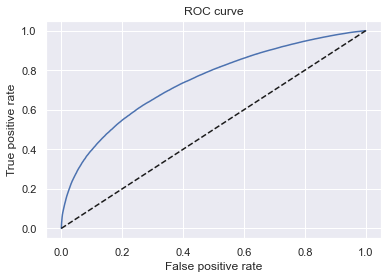

In [99]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [100]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7410590997130148

### Gini and Kolmogorov-Smirnov

In [101]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [102]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
1712452,1,0.265969,0
1694399,1,0.277351,0
1713500,0,0.279216,0
1712354,0,0.282086,0
1717596,0,0.288427,0


In [103]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
829096,1,0.995701,1
827576,1,0.995733,1
1376371,1,0.996164,1
1413499,1,0.996216,1
865859,1,0.996308,1


In [104]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [105]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,1712452,1,0.265969,0
1,1694399,1,0.277351,0
2,1713500,0,0.279216,0
3,1712354,0,0.282086,0
4,1717596,0,0.288427,0


In [106]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [107]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,1712452,1,0.265969,0,1,1,0
1,1694399,1,0.277351,0,2,2,0
2,1713500,0,0.279216,0,3,2,1
3,1712354,0,0.282086,0,4,2,2
4,1717596,0,0.288427,0,5,2,3


In [108]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [109]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,1712452,1,0.265969,0,1,1,0,0.000002,0.000003,0.000000
1,1694399,1,0.277351,0,2,2,0,0.000004,0.000005,0.000000
2,1713500,0,0.279216,0,3,2,1,0.000007,0.000005,0.000017
3,1712354,0,0.282086,0,4,2,2,0.000009,0.000005,0.000034
4,1717596,0,0.288427,0,5,2,3,0.000011,0.000005,0.000052


In [110]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
452129,829096,1,0.995701,1,452130,393908,58222,0.999991,0.999990,1.0
452130,827576,1,0.995733,1,452131,393909,58222,0.999993,0.999992,1.0
452131,1376371,1,0.996164,1,452132,393910,58222,0.999996,0.999995,1.0
452132,1413499,1,0.996216,1,452133,393911,58222,0.999998,0.999997,1.0
452133,865859,1,0.996308,1,452134,393912,58222,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

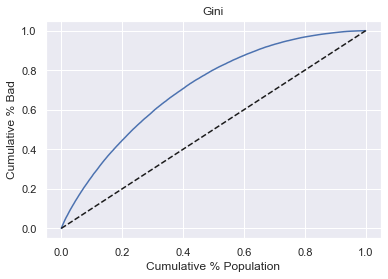

In [111]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [112]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4821181994260295

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

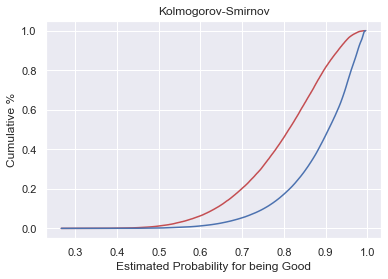

In [113]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [114]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.3546708689567365

# Applying the PD Model

### Calculating PD of individual accounts

In [115]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [116]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,addr_state:OH_WI_AZ_MA_UT_DE,addr_state:GA_IL_WY_RI,addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME,addr_state:FL,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:educ__ren_en__sm_b__mov,purpose:debt_consolidation,purpose:med__oth__house__wedd,purpose:major_purch__vacation__home_impr__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:60,term:36,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<30,mths_since_issue_d:30-33,mths_since_issue_d:33-40,mths_since_issue_d:41-46,mths_since_issue_d:46-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.582,int_rate:15.582-19.177,int_rate:>19.177,mths_since_earliest_cr_line:<167,mths_since_earliest_cr_line:167-250,mths_since_earliest_cr_line:251-355,mths_since_earliest_cr_line:356-417,mths_since_earliest_cr_line:>417,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:0,pub_rec:1-2,pub_rec:>=3,total_acc:<=27,total_acc:28-51,total_acc:>=52,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:Missing,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
1758074,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
686539,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
900731,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1727935,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
539695,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [117]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.123457,NaN
1,grade:A,1.675925,0.000000e+00
2,grade:B,1.208961,0.000000e+00
3,grade:C,0.907496,0.000000e+00
4,grade:D,0.682518,1.414555e-241
5,grade:E,0.462513,3.310872e-116
6,grade:F,0.217647,1.495515e-22
7,home_ownership:MORTGAGE,0.246595,0.000000e+00
8,home_ownership:OWN,0.113124,6.020898e-46
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18


In [118]:
y_hat_test_proba

array([0.95628869, 0.71094567, 0.94848373, ..., 0.92207408, 0.91582667,
       0.9325815 ])

### Creating a Scorecard

In [119]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.123457,NaN
1,grade:A,1.675925,0.000000e+00
2,grade:B,1.208961,0.000000e+00
3,grade:C,0.907496,0.000000e+00
4,grade:D,0.682518,1.414555e-241
5,grade:E,0.462513,3.310872e-116
6,grade:F,0.217647,1.495515e-22
7,home_ownership:MORTGAGE,0.246595,0.000000e+00
8,home_ownership:OWN,0.113124,6.020898e-46
9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18


In [120]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
 'verification_status:Verified',
 'purpose:educ__ren_en__sm_b__mov',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:<30',
 'int_rate:<8.392',
 'mths_since_earliest_cr_line:<167',
 'delinq_2yrs:0',
 'inq_last_6mths:0',
 'open_acc:0-3',
 'pub_rec:0',
 'total_acc:<=27',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=10K',
 'annual_inc:<20K',
 'mths_since_last_record:Missing']

In [121]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__ren_en__sm_b__mov,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:<30,0,NaN
9,int_rate:<8.392,0,NaN


In [122]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,2.123457,NaN
1,1,grade:A,1.675925,0.000000e+00
2,2,grade:B,1.208961,0.000000e+00
3,3,grade:C,0.907496,0.000000e+00
4,4,grade:D,0.682518,1.414555e-241
5,5,grade:E,0.462513,3.310872e-116
6,6,grade:F,0.217647,1.495515e-22
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00
8,8,home_ownership:OWN,0.113124,6.020898e-46
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18


In [123]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,2.123457,NaN,Intercept
1,1,grade:A,1.675925,0.000000e+00,grade
2,2,grade:B,1.208961,0.000000e+00,grade
3,3,grade:C,0.907496,0.000000e+00,grade
4,4,grade:D,0.682518,1.414555e-241,grade
5,5,grade:E,0.462513,3.310872e-116,grade
6,6,grade:F,0.217647,1.495515e-22,grade
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state


In [124]:
min_score = 300
max_score = 850

In [125]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                      2.123457
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.085740
delinq_2yrs                   -0.087491
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.649150
int_rate                      -0.683343
mths_since_earliest_cr_line   -0.023778
mths_since_issue_d            -1.742734
mths_since_last_record        -0.280985
open_acc                      -0.376684
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                     -0.029942
total_rev_hi_lim              -0.015662
verification_status            0.000000
Name: Coefficients, dtype: float64

In [126]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.8520520824203397

In [127]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                      2.123457
acc_now_delinq                 0.032536
addr_state                     0.409219
annual_inc                     0.274478
delinq_2yrs                    0.000000
emp_length                     0.181886
grade                          1.675925
home_ownership                 0.246595
initial_list_status            0.026189
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.039633
mths_since_issue_d             0.000000
mths_since_last_record         0.000000
open_acc                       0.000000
pub_rec                        0.128699
purpose                        0.211274
term                           0.174339
total_acc                      0.000000
total_rev_hi_lim               0.206204
verification_status            0.234301
Name: Coefficients, dtype: float64

In [128]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.964734379684642

In [129]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,2.123457,NaN,Intercept,149.409387
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374


In [130]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

<ipython-input-130-6383eee17b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,2.123457,NaN,Intercept,579.722355
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374


In [131]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.123457,NaN,Intercept,579.722355,580.0
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410,118.0
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210,85.0
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719,64.0
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938,48.0
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054,33.0
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924,15.0
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751,17.0
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549,8.0
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374,6.0


In [132]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

299.0

In [133]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [134]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [135]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,2.123457,NaN,Intercept,579.722355,580.0,0.277645
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410,118.0,0.079590
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210,85.0,-0.064210
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719,64.0,0.147281
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938,48.0,-0.022938
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054,33.0,0.456946
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924,15.0,-0.313924
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751,17.0,-0.350751
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549,8.0,0.040451
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374,6.0,-0.134374


In [136]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

<ipython-input-136-417bcaecab8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.123457,NaN,Intercept,579.722355,580.0,0.277645,580.0
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410,118.0,0.079590,118.0
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210,85.0,-0.064210,85.0
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719,64.0,0.147281,64.0
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938,48.0,-0.022938,48.0
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054,33.0,0.456946,33.0
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924,15.0,-0.313924,15.0
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751,17.0,-0.350751,17.0
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549,8.0,0.040451,8.0
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374,6.0,-0.134374,6.0


In [137]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

299.0

In [138]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

847.0

### Caclulating Credit Score

In [139]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,addr_state:OH_WI_AZ_MA_UT_DE,addr_state:GA_IL_WY_RI,addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME,addr_state:FL,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:educ__ren_en__sm_b__mov,purpose:debt_consolidation,purpose:med__oth__house__wedd,purpose:major_purch__vacation__home_impr__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:60,term:36,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<30,mths_since_issue_d:30-33,mths_since_issue_d:33-40,mths_since_issue_d:41-46,mths_since_issue_d:46-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.582,int_rate:15.582-19.177,int_rate:>19.177,mths_since_earliest_cr_line:<167,mths_since_earliest_cr_line:167-250,mths_since_earliest_cr_line:251-355,mths_since_earliest_cr_line:356-417,mths_since_earliest_cr_line:>417,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:0,pub_rec:1-2,pub_rec:>=3,total_acc:<=27,total_acc:28-51,total_acc:>=52,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:Missing,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
1758074,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
686539,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
900731,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1727935,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
539695,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [140]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.123457,NaN,Intercept,579.722355,580.0,0.277645,580.0
1,1,grade:A,1.675925,0.000000e+00,grade,117.920410,118.0,0.079590,118.0
2,2,grade:B,1.208961,0.000000e+00,grade,85.064210,85.0,-0.064210,85.0
3,3,grade:C,0.907496,0.000000e+00,grade,63.852719,64.0,0.147281,64.0
4,4,grade:D,0.682518,1.414555e-241,grade,48.022938,48.0,-0.022938,48.0
5,5,grade:E,0.462513,3.310872e-116,grade,32.543054,33.0,0.456946,33.0
6,6,grade:F,0.217647,1.495515e-22,grade,15.313924,15.0,-0.313924,15.0
7,7,home_ownership:MORTGAGE,0.246595,0.000000e+00,home_ownership,17.350751,17.0,-0.350751,17.0
8,8,home_ownership:OWN,0.113124,6.020898e-46,home_ownership,7.959549,8.0,0.040451,8.0
9,9,addr_state:MO_NC_MD_IN_AK_NE_NJ,0.087184,9.805979e-18,addr_state,6.134374,6.0,-0.134374,6.0


In [141]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [142]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [143]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,addr_state:OH_WI_AZ_MA_UT_DE,addr_state:GA_IL_WY_RI,addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME,addr_state:FL,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:educ__ren_en__sm_b__mov,purpose:debt_consolidation,purpose:med__oth__house__wedd,purpose:major_purch__vacation__home_impr__car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:60,term:36,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<30,mths_since_issue_d:30-33,mths_since_issue_d:33-40,mths_since_issue_d:41-46,mths_since_issue_d:46-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.582,int_rate:15.582-19.177,int_rate:>19.177,mths_since_earliest_cr_line:<167,mths_since_earliest_cr_line:167-250,mths_since_earliest_cr_line:251-355,mths_since_earliest_cr_line:356-417,mths_since_earliest_cr_line:>417,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:0,pub_rec:1-2,pub_rec:>=3,total_acc:<=27,total_acc:28-51,total_acc:>=52,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:Missing,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90
1758074,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
686539,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
900731,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1727935,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
539695,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [144]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [145]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:MO_NC_MD_IN_AK_NE_NJ,addr_state:MI_PA_MN_TN_VA_HI,addr_state:OH_WI_AZ_MA_UT_DE,addr_state:GA_IL_WY_RI,addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME,addr_state:FL,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Source Verified,verification_status:Not Verified,purpose:debt_consolidation,purpose:med__oth__house__wedd,purpose:major_purch__vacation__home_impr__car,purpose:credit_card,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7-9,emp_length:10,mths_since_issue_d:30-33,mths_since_issue_d:33-40,mths_since_issue_d:41-46,mths_since_issue_d:46-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:8.392-11.987,int_rate:11.987-15.582,int_rate:15.582-19.177,int_rate:>19.177,mths_since_earliest_cr_line:167-250,mths_since_earliest_cr_line:251-355,mths_since_earliest_cr_line:356-417,mths_since_earliest_cr_line:>417,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:1-2,pub_rec:>=3,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_record:0-37,mths_since_last_record:37-60,mths_since_last_record:61-90,mths_since_last_record:>90,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA,verification_status:Verified,purpose:educ__ren_en__sm_b__mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:<30,int_rate:<8.392,mths_since_earliest_cr_line:<167,delinq_2yrs:0,inq_last_6mths:0,open_acc:0-3,pub_rec:0,total_acc:<=27,acc_now_delinq:0,total_rev_hi_lim:<=10K,annual_inc:<20K,mths_since_last_record:Missing
1758074,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1,0,0,1
686539,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1
900731,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1
1727935,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1
539695,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1


In [146]:
scorecard_scores = df_scorecard['Score - Final']

In [147]:
inputs_test_with_ref_cat_w_intercept.shape

(452134, 102)

In [148]:
scorecard_scores.shape

(102,)

In [149]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [150]:
scorecard_scores.shape

(102, 1)

In [151]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [152]:
y_scores.head()

,0
1758074,647.0
686539,492.0
900731,634.0
1727935,523.0
539695,575.0


In [153]:
y_scores.tail()

,0
1671028,602.0
513966,606.0
484353,603.0
2196520,598.0
1598126,616.0


### From Credit Score to PD

In [154]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [155]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
1758074,0.956045
686539,0.706141
900731,0.947592
1727935,0.788732
539695,0.886587


In [156]:
y_hat_test_proba[0: 5]

array([0.95628869, 0.71094567, 0.94848373, 0.79048137, 0.88773049])

In [157]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.265969
1    0.277351
2    0.279216
3    0.282086
4    0.288427
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [158]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [159]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,47366,10856
1,185012,208900


In [160]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.104761,0.024011
1,0.409197,0.462031


In [161]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5667921456913216

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score

In [163]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99994847, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.53863807e-06, 2.79250188e-05, ...,
        9.99994923e-01, 9.99994923e-01, 1.00000000e+00]),
 array([1.99630806, 0.99630806, 0.99561828, ..., 0.30206568, 0.27921555,
        0.26596929]))

In [164]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

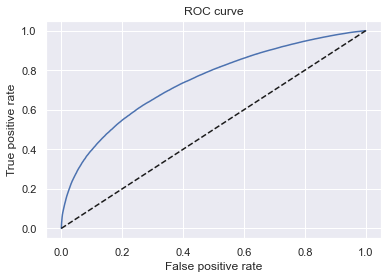

In [166]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [167]:
thresholds

array([1.99630806, 0.99630806, 0.99561828, ..., 0.30206568, 0.27921555,
       0.26596929])

In [168]:
thresholds.shape

(95816,)

In [169]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [170]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [171]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.996308,0.0,0.000000
1,0.996308,0.0,0.000003
2,0.995618,0.0,0.000028
3,0.995618,0.0,0.000033
4,0.995149,0.0,0.000162


In [172]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [173]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [174]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1933.0
1,0.996308,0.0,0.000003,824.0
2,0.995618,0.0,0.000028,812.0
3,0.995618,0.0,0.000033,812.0
4,0.995149,0.0,0.000162,805.0


In [175]:
df_cutoffs['Score'][0] = max_score

In [176]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.996308,0.0,0.000003,824.0
2,0.995618,0.0,0.000028,812.0
3,0.995618,0.0,0.000033,812.0
4,0.995149,0.0,0.000162,805.0


In [177]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
95811,0.308779,0.999931,0.999992,374.0
95812,0.305347,0.999948,0.999992,372.0
95813,0.302066,0.999948,0.999995,371.0
95814,0.279216,1.000000,0.999995,364.0
95815,0.265969,1.000000,1.000000,359.0


In [178]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [179]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [180]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,452134,0.000000,1.000000
1,0.996308,0.0,0.000003,824.0,1,452133,0.000002,0.999998
2,0.995618,0.0,0.000028,812.0,11,452123,0.000024,0.999976
3,0.995618,0.0,0.000033,812.0,13,452121,0.000029,0.999971
4,0.995149,0.0,0.000162,805.0,64,452070,0.000142,0.999858


In [181]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
95811,0.308779,0.999931,0.999992,374.0,452127,7,0.999985,0.000015
95812,0.305347,0.999948,0.999992,372.0,452128,6,0.999987,0.000013
95813,0.302066,0.999948,0.999995,371.0,452129,5,0.999989,0.000011
95814,0.279216,1.000000,0.999995,364.0,452132,2,0.999996,0.000004
95815,0.265969,1.000000,1.000000,359.0,452134,0,1.000000,0.000000


In [182]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.956037,0.034781,0.236406,647.0,95148,356986,0.210442,0.789558
5001,0.956025,0.034781,0.236469,647.0,95173,356961,0.210497,0.789503
5002,0.956024,0.034798,0.236469,647.0,95174,356960,0.210500,0.789500
5003,0.956010,0.034798,0.236578,647.0,95217,356917,0.210595,0.789405
5004,0.956009,0.034815,0.236578,647.0,95218,356916,0.210597,0.789403
5005,0.956009,0.034815,0.236581,647.0,95219,356915,0.210599,0.789401
5006,0.956009,0.034832,0.236581,647.0,95220,356914,0.210601,0.789399
5007,0.956002,0.034832,0.236629,647.0,95239,356895,0.210643,0.789357
5008,0.956001,0.034832,0.236634,647.0,95241,356893,0.210648,0.789352
5009,0.956000,0.034832,0.236644,647.0,95245,356889,0.210657,0.789343


In [183]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.980451,0.004620,0.078751,706.0,31290,420844,0.069205,0.930795
1001,0.980432,0.004620,0.078886,706.0,31343,420791,0.069322,0.930678
1002,0.980432,0.004620,0.078891,706.0,31345,420789,0.069327,0.930673
1003,0.980427,0.004620,0.078929,706.0,31360,420774,0.069360,0.930640
1004,0.980427,0.004637,0.078929,706.0,31361,420773,0.069362,0.930638
1005,0.980422,0.004637,0.078962,706.0,31374,420760,0.069391,0.930609
1006,0.980422,0.004655,0.078962,706.0,31375,420759,0.069393,0.930607
1007,0.980391,0.004655,0.079152,706.0,31450,420684,0.069559,0.930441
1008,0.980391,0.004655,0.079157,706.0,31452,420682,0.069563,0.930437
1009,0.980382,0.004655,0.079218,706.0,31476,420658,0.069617,0.930383


In [184]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [185]:
df_scorecard.to_csv('df_scorecard.csv')